# Generate Line Chart

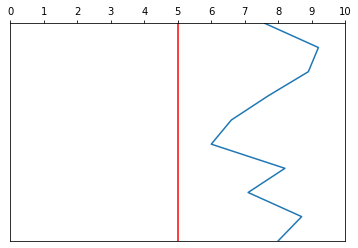

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = [8, 8.7, 7.1, 8.2, 6, 6.6, 7.7 , 8.9, 9.2, 7.6] #**data from user**

fig, ax = plt.subplots()  #create a figure containing a single axes

ax.xaxis.tick_top() #move x axis to the top

plt.xlim([0, 10]) #set a fixed range of value for x axis
plt.ylim([1, 10]) #set a fixed range of value for y axis

plt.xticks(np.arange(0, 11, 1)) #set frequency of tick marks for x axis
plt.yticks(np.arange(1, 11, 1)) #set frequency of tick marks for y axis

plt.axvline(x = 5, color = 'r', linestyle = '-') #add middle line

plt.tick_params(left = False, labelleft = False) #remove ticks on y axis

fixedYRange = np.arange(1, 11, 1) #set for range for the plot to locate the data points on y axis

ax.plot(data, fixedYRange)  #plot some data on the axes. (x, y)

plt.show()

# Generate Bar Chart

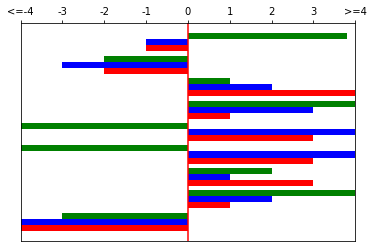

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib.ticker import FuncFormatter, MaxNLocator

data = [-4, 1, 3, 3, 3, 1, 5, -2, -1] #**data from user**
data2 = [-5, 2, 1, 4, 5, 3, 2, -3, -1] #**data from user**
data3 = [-3, 4, 2, -4, -5, 4, 1, -2, 3.8] #**data from user**

fig, ax = plt.subplots()  #create a figure containing a single axes

width = 0.27 #the width of the bars

ax.xaxis.tick_top() #move x axis to the top

plt.xlim([-4, 4]) #set a fixed range of value for x axis

plt.axvline(x = 0, color = 'r', linestyle = '-') #add middle line

plt.tick_params(left = False, labelleft = False) #remove ticks on y axis

fixedXRange = np.arange(-4, 5, 1) #set for range for the plot to locate the data points on x axis, FixedLocator error

labels = ('<=-4', '-3', '-2', '-1', '0', '1', '2', '3', '>=4') #set the labels of each bins
y_pos = np.arange(len(labels)); #set x coordinates of the bars

ax.set_xticks(fixedXRange)
ax.set_xticklabels(labels)

ax.barh(y_pos, data, width, align='center', color='r') #plot a horizontal bar chart
ax.barh(y_pos+width, data2, width, align='center', color='b') #plot a horizontal bar chart
ax.barh(y_pos+width*2, data3, width, align='center', color='g') #plot a horizontal bar chart

plt.show()

# Creating single file from single template

In [5]:
import os
import datetime as dt

from docxtpl import DocxTemplate, InlineImage
from docx2pdf import convert

# create a document object
doc = DocxTemplate(os.getcwd() + "\templates\inviteTmpl.docx")

# create context dictionary
context = {
    "todayStr": dt.datetime.now().strftime("%d-%b-%Y"),
    "recipientName": "Chaitanya",
    "evntDtStr": "21-Oct-2021",
    "venueStr": "the beach",
    "senderName": "Sanket",
}

# inject image into the context
context['bannerImg'] = InlineImage(doc, 'images/party_banner_0.png')

# render context into the document object
doc.render(context)

# save the document object as a word file
doc.save('invitation.docx')

# convert word file to a pdf file
convert('invitation.docx', 'invitation.pdf')

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.30s/it]


# Creating multiple files from single template

In [6]:
from docxtpl import DocxTemplate, InlineImage
import datetime as dt
from docx2pdf import convert

# template word file path
tmplPath = "templates/inviteTmpl.docx"

personNames = ["Aakav", "Aakesh", "Aarav",
               "Advik", "Chaitanya", "Chandran", "Darsh"]

# run for each person in a for loop
for pItr, p in enumerate(personNames):
    # create a document object
    doc = DocxTemplate(tmplPath)

    # create context dictionary
    context = {
        "todayStr": dt.datetime.now().strftime("%d-%b-%Y"),
        "recipientName": p,
        "evntDtStr": "21-Oct-2021",
        "venueStr": "the beach",
        "senderName": "Sanket",
    }

    # inject image into the context
    bannerImgPath = 'images/party_banner_{0}.png'.format(pItr % 3)
    imgObj = InlineImage(doc, bannerImgPath)
    context['bannerImg'] = imgObj

    # render context into the document object
    doc.render(context)

    # save the document object as a word file
    resultFilePath = 'invites/invitation_{0}.docx'.format(pItr)
    doc.save(resultFilePath)

    # convert the word file into pdf
    convert(resultFilePath, resultFilePath.replace('.docx', '.pdf'))

print("execution complete...")

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.81s/it]

execution complete...


# Reports Automation

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.41s/it]


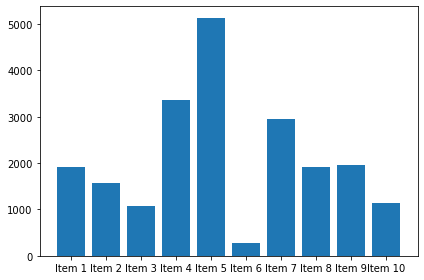

In [8]:
import datetime as dt
import random
from docx2pdf import convert
import matplotlib.pyplot as plt
from docxtpl import DocxTemplate, InlineImage

# create a document object
doc = DocxTemplate("templates/reportTmpl.docx")

# create data for reports
salesTblRows = []
for k in range(10):
    costPu = random.randint(1, 15)
    nUnits = random.randint(100, 500)
    salesTblRows.append({"sNo": k+1, "name": "Item "+str(k+1),
                         "cPu": costPu, "nUnits": nUnits, "revenue": costPu*nUnits})

topItems = [x["name"] for x in sorted(salesTblRows, key=lambda x: x["revenue"], reverse=True)][0:3]

todayStr = dt.datetime.now().strftime("%d-%b-%Y")

# create context to pass data to template
context = {
    "reportDtStr": todayStr,
    "salesTblRows": salesTblRows,
    "topItemsRows": topItems
}

# inject image into the context
fig, ax = plt.subplots()
ax.bar([x["name"] for x in salesTblRows], [x["revenue"] for x in salesTblRows])
fig.tight_layout()
fig.savefig("images/trendImg.png")
context['trendImg'] = InlineImage(doc, 'images/trendImg.png')

# render context into the document object
doc.render(context)

# save the document object as a word file
reportWordPath = 'reports/report_{0}.docx'.format(todayStr)
doc.save(reportWordPath)

# convert the word file as pdf file
convert(reportWordPath, reportWordPath.replace(".docx", ".pdf"))